In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import missingno as msno

In [2]:
# Importing the dataset
data = pd.read_csv("data.csv")

In [3]:
# Printing the 1st 5 columns
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [4]:
# Printing the dimenions of data
data.shape

(30697, 27)

In [5]:
# Viewing the column heading
data.columns

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot',
       'match_id', 'team_id', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [6]:
# Inspecting the target variable
data['is_goal'].value_counts()

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

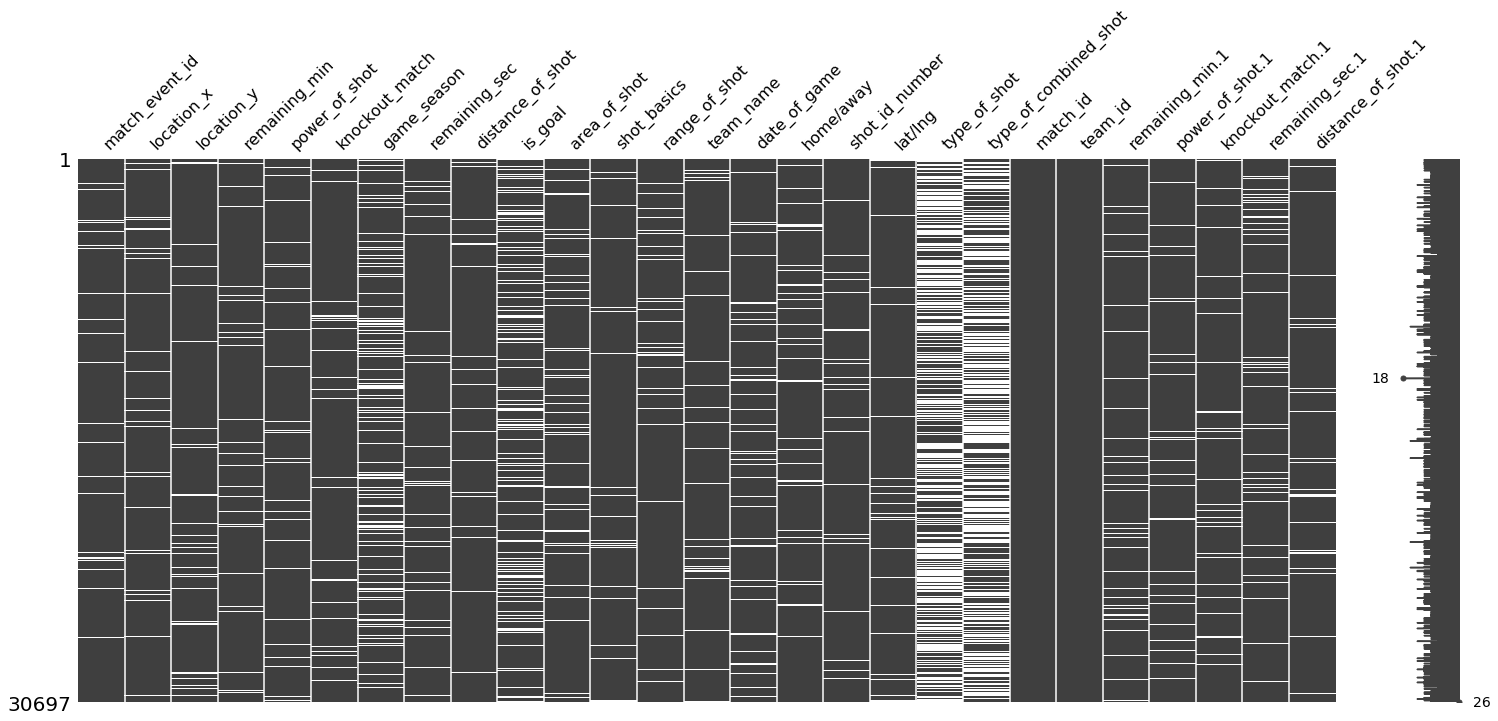

In [7]:
msno.matrix(data)

In [8]:
# Identifying the unique number of values in the dataset
data.nunique()

match_event_id             618
location_x                 488
location_y                 450
remaining_min               12
power_of_shot                7
knockout_match               2
game_season                 20
remaining_sec               60
distance_of_shot            73
is_goal                      2
area_of_shot                 6
shot_basics                  7
range_of_shot                5
team_name                    1
date_of_game              1558
home/away                   74
shot_id_number           29134
lat/lng                     38
type_of_shot                57
type_of_combined_shot        6
match_id                  1559
team_id                      1
remaining_min.1            291
power_of_shot.1            206
knockout_match.1           382
remaining_sec.1            354
distance_of_shot.1         271
dtype: int64

In [9]:
# Dropping useless columns
data.drop(['team_name', 'team_id', 'date_of_game'], axis=1, inplace=True)

In [10]:
# Imputing missing values

In [11]:
data['match_event_id'].isna().sum()

1563

In [12]:
data['match_event_id'] = data['match_event_id'].fillna(data['match_event_id'].mean())
data['match_event_id'].isna().sum()

0

In [13]:
data['location_x'].isna().sum()

1461

In [14]:
data['location_x'] = data['location_x'].fillna(data['location_x'].mean())
data['location_x'].isna().sum()

0

In [15]:
data['location_y'].isna().sum()

1540

In [18]:
data['location_y'] = data['location_y'].fillna(data['location_y'].mean())
data['location_y'].isna().sum()

0

In [19]:
data['remaining_min'].isna().sum()

1562

In [21]:
data['remaining_min'] = data['remaining_min'].fillna(data['remaining_min'].mean())
data['remaining_min'].isna().sum()

0

In [22]:
data['power_of_shot'].isna().sum()

1486

In [23]:
data['power_of_shot'] = data['power_of_shot'].fillna(data['power_of_shot'].mean())
data['power_of_shot'].isna().sum()

0

In [24]:
data['knockout_match'].isna().sum()

1517

In [25]:
data['knockout_match'] = data['knockout_match'].fillna(-1)
data['knockout_match'].isna().sum()

0

In [26]:
data['game_season'].isna().sum()

5862

In [27]:
data['game_season'].dtype

dtype('O')

In [28]:
data['game_season'] = data['game_season'].fillna('Unspecified')
data['game_season'].isna().sum()

0

In [29]:
data['remaining_sec'].isna().sum()

1594

In [31]:
data['remaining_sec'] = data['remaining_sec'].fillna(data['remaining_sec'].median())
data['remaining_sec'].isna().sum()

0

In [32]:
data['distance_of_shot'].isna().sum()

1567

In [33]:
data['distance_of_shot'] = data['distance_of_shot'].fillna(data['distance_of_shot'].mean())
data['distance_of_shot'].isna().sum()

0

In [34]:
data['area_of_shot'].isna().sum()

1502

In [35]:
data['area_of_shot'] = data['area_of_shot'].fillna('Unspecified')
data['area_of_shot'].isna().sum()

0

In [36]:
data['shot_basics'].isna().sum()

1575

In [37]:
data['shot_basics'] = data['shot_basics'].fillna('Unspecified')
data['shot_basics'].isna().sum()

0

In [38]:
data['range_of_shot'].isna().sum()

1564

In [39]:
data['range_of_shot'] = data['range_of_shot'].fillna('Unspecified')
data['range_of_shot'].isna().sum()

0

In [40]:
data['home/away'].isna().sum()

1497

In [41]:
data['home/away'] = data['home/away'].fillna('Unspecified')
data['home/away'].isna().sum()

0